# Purpose
This file simply will create more data inside the replay buffer to be used by our approximating algorithm. 

In [1]:
import pickle
import os.path
from sp_sims.simulators.stochasticprocesses import RaceOfExponentials
from tqdm import tqdm 
from sp_sims.learning.rl import *

In [2]:
class Args:
  state_limit = 1 #Inclusive # DO NOT CHANGE, Architecture can't take it yet
  init_state = 0
  sample_budget =5
  batch_size =256
  poptimizer_lr = 1e-2
  coptimizer_lr = 1e-2
  clipping_limit = 16 # Sampling rate no Bigger than this. 
  num_epochs = 10000
  detection_guesses=1000
  num_replay_samples = 1 # How many batches do we sample at a time to learn 
# Data Class
class MetaState:
  states: list
  holding_times: list
  def __init__(self,states, holding_times):
    self.states = states
    self.holding_times = holding_times

args = Args()

In [3]:
existed = os.path.exists('./ReplayBuffer/PRECISE_buffer_smpbud{}_to256.pkl'.format(args.sample_budget))
buffer_file = open('./ReplayBuffer/PRECISE_buffer_smpbud{}_to256.pkl'.format(args.sample_budget),'wb')
if not existed or rbuffer != None:
    # Unlimited Sample Here
    rbuffer = ReplayBuffer(sampbudget=args.sample_budget)
else: 
    rbuffer = pickle.load(buffer_file)

In [4]:
# Loop for Generating More and More Data
for i in tqdm(range(20)):
    #rbuffer.populate_replay_buffer(args.sample_budget, args.batch_size)
    rbuffer.populate_replay_buffer(args.batch_size, 'cheaty')

    # In each iteration save so we don't lose data. 
    print('We have size', len(rbuffer.memory) )


 33%|███▎      | 1/3 [00:05<00:10,  5.01s/it]

We have size 256


 67%|██████▋   | 2/3 [00:10<00:05,  5.14s/it]

We have size 512


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]

We have size 768


In [12]:

with open('./ReplayBuffer/PRECISE_buffer_smpbud{}_to32.pkl'.format(args.sample_budget),'wb') as f:
    pickle.dump(rbuffer.memory, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()
print('Total size of buffer : ',len(rbuffer.memory))

Total size of buffer :  25600


In [7]:
# Load From Outside
rbuffer = ReplayBuffer(sampbudget=args.sample_budget)
#with open('./ReplayBuffer/FIXEDUNI_buffer_smpbud{}_to32.pkl'.format(args.sample_budget),'wb') as f:
with open('./ReplayBuffer/GAUSS_ buffer_smpbud{}_to32.pkl'.format(args.sample_budget),'rb') as f:
    rbuffer.memory = pickle.load(f)
    f.close()
print('Total size of buffer : ',len(rbuffer.memory))

EOFError: Ran out of input

# Statistcs

We can use the code below to check the statistics on the amoun of data we have for each sampling rate. 

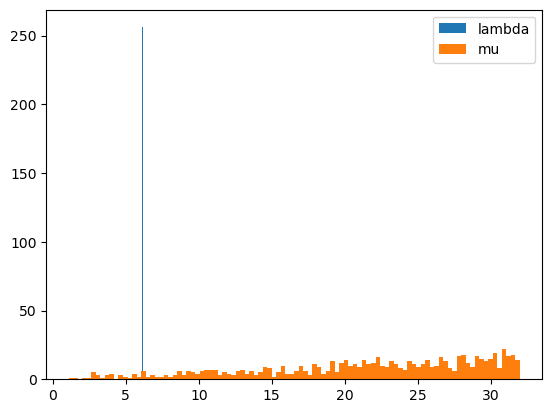

Total count is  768


In [8]:
import matplotlib.pyplot as plt
actions = [e[1] for e in rbuffer.memory]
states0 = [e[0][0] for e in rbuffer.memory]
states1 = [e[0][1] for e in rbuffer.memory]
plt.clf()
#plt.hist(actions, bins=100)
plt.hist(states0, bins=100,label='lambda')
plt.hist(states1, bins=100,label='mu')
plt.legend()
plt.show()
print('Total count is ',len(rbuffer.memory))

[12.674113725490196, 1.5058352941176472, 18.446482352941178, 12.548627450980392, 13.176058823529413, 22.3365568627451, 1.756807843137255, 26.226631372549022, 6.399800000000001, 6.525286274509805, 18.320996078431374, 2.1332666666666666, 3.137156862745098, 6.399800000000001, 5.521396078431373, 19.073913725490197, 7.905635294117648, 0.8784039215686275, 5.521396078431373, 4.768478431372549, 8.407580392156863, 3.137156862745098, 6.901745098039216, 2.6352117647058826, 13.928976470588236, 2.007780392156863, 5.521396078431373, 11.419250980392158, 8.156607843137255, 9.787929411764706, 16.187729411764707, 11.16827843137255, 27.230521568627452, 16.31321568627451, 10.791819607843138, 18.070023529411767, 6.399800000000001, 4.768478431372549, 14.68189411764706, 4.6429921568627455, 14.179949019607845, 18.446482352941178, 0.12548627450980393, 0.3764588235294118, 25.975658823529415, 8.784039215686276, 13.176058823529413, 26.352117647058826, 13.42703137254902, 3.0116705882352943, 13.928976470588236, 3.7

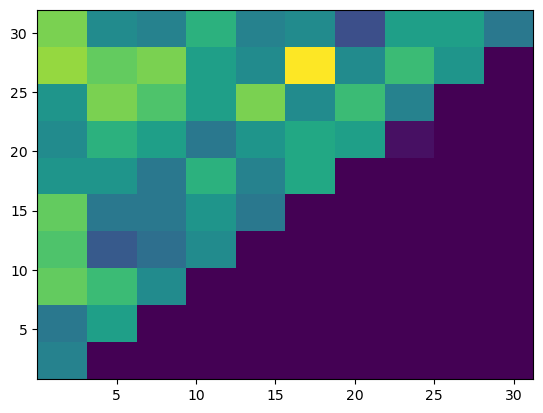

Total chunk is  768


In [5]:

import matplotlib.pyplot as plt
actions = [e[1] for e in rbuffer.memory]
states0 = [e[0][0] for e in rbuffer.memory]
states1 = [e[0][1] for e in rbuffer.memory]
print(states0)
plt.clf()
plt.hist2d(states0,states1, bins=10)
plt.show()
print('Total chunk is ',len(rbuffer.memory))